### 2.3.3 線形モデル

#### 2.3.3.1 線形モデルによる回帰

|線形モデルによる回帰|
|:-|

線形モデルは実用的に広く用いられており，この数十年間のあいだ盛んに研究されたモデルである．線形モデルは入力特徴量の**線形関数**を用いて予測を行うものである．

回帰問題では、線形モデルによる一般的な予測式は以下のようになる。
$$
\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b
$$
ここで$x[0]$から$x[p]$は、ある1データポイントの特徴量（この例では特徴量の数は$p+1$）を示し、$w$と$b$は学習されたモデルのパラメータであり、$\hat{y}$はモデルからの学習である。特徴量が一つしかないデータセットであれば次のようになる。
$$
\hat{y} = w[0] \times x[0] + b
$$

この数式は直線を表している。$w[0]$は傾きを、$b$は$y$切片を意味する。もっと特徴量がある場合には、$w$にはそれぞれの特徴量の軸に対する傾きがはいることになる。別の考え方として、予測されるレスポンスは入力特徴量の重み付き和になると考えることもできる。重みは$w$で表され、負になることもある。  
一次元のwaveデータセットで$w[0]$と$b$を求めてみると、下の図に示したような直線になる。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

w[0]: 0.393906  b: -0.031804


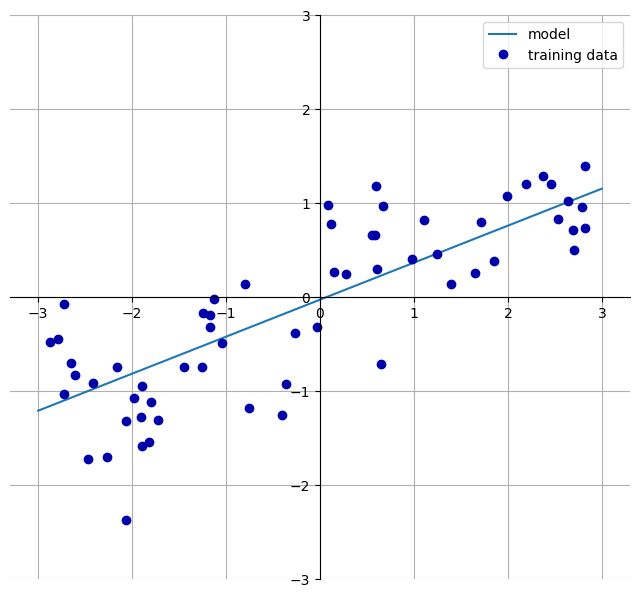

In [3]:
mglearn.plots.plot_linear_regression_wave() # w[0]は傾き、bは切片

**図2-11 waveデータセットを用いた線形モデルによる予測**

線形モデルによる回帰では，傾きw[0]: 0.393906  y切片b: -0.031804 とわかった．


このモデルで作られる直線と、KNeighborsRegressorによる予測とを比べると、直線で予測するのは制約が強すぎると感じるかもしれない。データの細かいディティールがすべて失われているように見えるだろう。ある意味でそれは正しい。このモデルは、ターゲット$y$が、特徴量の線形和で表すことができるという、強い（そして若干非現実的な）仮定を置いているからだ。ただし、１次元のデータを見ただけでゃ、少し歪んだ見方になっているかもしれない。多数の特徴量を持つデータに対しては、線形モデルは非常に強力なのだ。特に、訓練データのデータポイント数よりも特徴量の数のほうが多い場合には、どのような$y$でも完全に訓練データセットの線形関数としてモデル化できる。

---

線形モデルを用いた回帰にはさまざまなアルゴリズムがある。これらのモデルの相違点は、パラメータ$w$と$b$を訓練データから学習する方法と、モデルの複雑さを制御する方法にある。次に、最もよく用いられる線形モデルを用いた回帰手法を見ていこう。

#### 2.3.3.2 線形回帰（通常最小二乗法）

#### <span style="color:orange">線形回帰（通常最小二乗法）</span>

線形回帰，もしくは線形最小二乗法は，最も単純で，最も古典的な線形回帰手法である．  
もっとも単純で、最も古典的な線形回帰手法である。線形回帰では、訓練データにおいて、予測と真の回帰ターゲット$y$**との平均二乗誤差**が最小になるように、パラメータ$w$と$b$を求める。平均二乗誤差は、予測と真の値の差を二乗したものの平均値である。線形回帰にはパラメータがない。これはいいことではあるが、モデルの複雑さを制御する方法がないことを意味する。

次のコードは**図2-11**に示したモデルを作成する。

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


線形回帰（通常最小二乗法）では
傾きlr.coef_: [0.39390555]
y切片lr.intercept_: -0.031804343026759746
とわかった．    
**訓練データから得られた属性にはすべて最後にアンダースコアを付ける習慣になっている。これは、ユーザが設定したパラメータと明確に区別するためだ。**

訓練セットとテストセットに対する性能を確認する．

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


$R^2$が0.66というのはあまりよくないが，訓練セットとテストセットに対する値が非常に近い．これは，おそらくは**適合不足であって，過剰適合ではない**ことを意味する．このような１次元データセットは，モデルがとても単純なので過剰適合の危険は少ない．

しかし、高次元のデータセットに対しては（つまりデータセットが多くの特徴量を持つ場合は）、線形モデルはより強力になるので、過剰適合の可能性が高くなる。LinearRegressionが、boston_housingのデータセットのような、より複雑なデータセットに対してどのような挙動を示すか見てみよう。前述したように、このデータセットには導出された104の特徴量を持つ506のサンプルがある。まず、データセットを読み込み、訓練セットとテストセットに分割する。そして、先ほどと同じように線形回帰モデルを作る。

In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

訓練セットとテストセットのスコアを比べると、訓練データに対しては非常に正確だが、テストセットの$R^2$値はずっと悪いことがわかる。

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


このように訓練セットとテストセットで性能が大きく異なるのは，過剰適合が起きている明らかな兆候である．したがって，腹圧度を制御できるモデルを探さなければならない．もっとも一般的な手法は**リッジ回帰**である．

#### 2.3.3.3 リッジ回帰

#### <span style="color:orange">リッジ回帰</span>

リッジ回帰は線形モデルによる回帰の一つである．予測に用いられる．しかし，リッジ回帰では，係数（$w$）を，訓練データに対する予測だけでなく，他の制約に対しても最適化する．ここでは、**係数の絶対値の大きさを可能な限り小さくしたい**。つまり、$w$の要素をなるべく0に近くしたいのだ。直感的には、予測をうまく行いつつ、個々の特徴量が出力に与える影響をなるべく小さくしたい（つまり傾きを小さくしたい）。この制約条件は、**正則化**の一例である。正則化とは、過剰適合を防ぐために明示的にモデルを制約することである。リッジ回帰で用いられている正則化は、L2正則化と呼ばれる。  
リッジ回帰は、linear_model.Ridgeに実装されている。これをboston_housingデータセットで試してみよう。

<span style="color:darkgreen">過学習を防ぎ、モデルの安定性や解の一意性を高めるために重要です。これにより、リッジ回帰は、特徴量が多い場合や多重共線性がある場合でも、より良い一般化性能を持つ予測モデルを構築することができます。</span>

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


結果からわかる通り，RidgeモデルはLinearRegressionモデルよりも訓練セットに対するスコアは低いが，テストセットに対するスコアは高い．これは期待された通りである．線形回帰ではデータに対して過剰適合していた．Ridgeは，制約の強いモデルなので，過剰適合の危険は少ない．複雑どの低いモデルは，訓練セットに対する性能は低いが汎化性能は高い．我々が興味を持っているのは汎化性能だけなので，LinearRegressionモデルよりもRidgeモデルをつかったほうがよい．

Ridgeモデルでは，
モデルの簡潔さ（0に近い係数の数）と，訓練セットに対する性能がトレードオフの関係になる，このどちらに重くを置くかは，ユーザがalphaパラメータを用いて指定することができる．

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


alphaを小さくすると，係数の制約は小さくなる．（訓練精度が上がり，テスト精度（汎化性能）が下がることで過剰適合に近づく）alphaが非常に小さい値になると，係数への制約はほとんどなくなり，LinearRegressionと同じような挙動となる．

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


このケースでは，alpha=0.1がうまくいっているように見える，alpphaが大きい場合は小さな場合よりもcoef_の要素の絶対値が小さくなることが期待される．この期待が正しいことは以下で確認できる．

len(Ridge alpha=1.coef_): 104
len(Ridge alpha=10.coef_): 104
len(Ridge alpha=0.1.coef_): 104
len(LinearRegression): 104


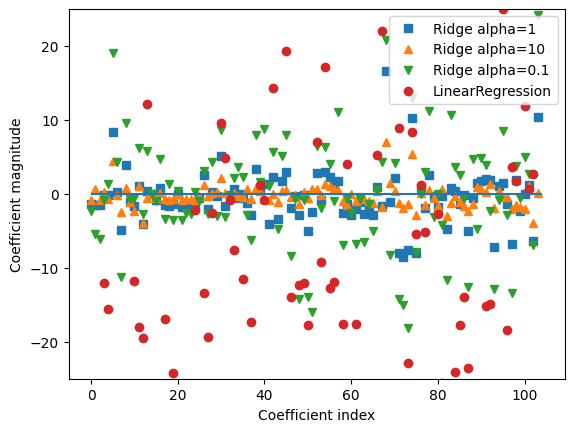

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
ax.set_ylim(-25, 25)
plt.legend()

print("len(Ridge alpha=1.coef_): " + str(len(ridge.coef_)))
print("len(Ridge alpha=10.coef_): " + str(len(ridge10.coef_)))
print("len(Ridge alpha=0.1.coef_): " + str(len(ridge01.coef_)))
print("len(LinearRegression): " + str(len(lr.coef_)))

**図2-12 さまざまなalphaによるリッジ回帰と、線形回帰に対する係数の大きさの比較**

$x$軸はcoef_の要素を表している。$x=0$は最初の特徴量に対する係数、$x=1$は２番目の特徴量に対する係数、というようになっており、$x=100$まで続いている。$y$軸は、特徴量に対応する係数の数値を表している。この図からわかるのは、alpha=10では、ほとんどの係数が-3から3の間にあることだ。Ridgeモデルのalpha=1ではもう少し広い範囲になる。alpha=0.1の点は、さらに広い範囲になり、正規化されていない線形回帰の場合（alpha=0に対応する）は、さらに広くなってこの図には表示されていないものもある。

正規化の影響を理解するもう一つの方法として、alphaの値を固定して、利用できる訓練データの量を変化させてみよう。**図2-13**に示したプロットは、boston_housingデータセットからサイズを大きくしながらデータを抽出して、LinearRegressionとRidge(alpha=1)で学習された結果を評価したものである。この図は、モデルの性能をデータセットサイズの関数として示したもので、**学習曲線**（Learning curve）と呼ばれる。

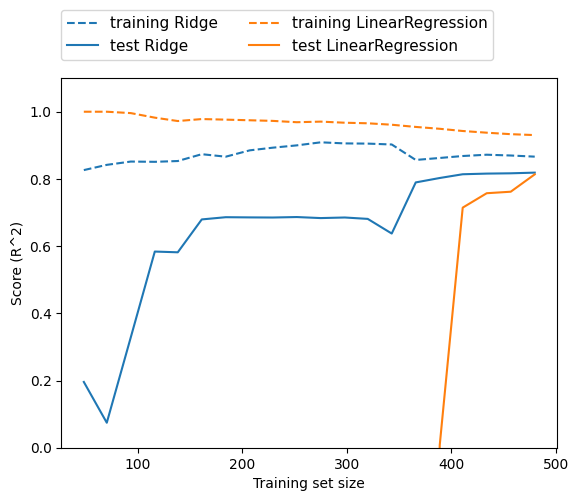

In [13]:
mglearn.plots.plot_ridge_n_samples()

**図2-13 boston_housingデータセットに対するリッジ回帰と線形回帰の学習曲線**

期待されている通り、リッジ回帰でも線形回帰でも、訓練スコアはすべてのデータサイズにおいて、テストスコアよりも高い。リッジ回帰では正則化が行われているため、訓練か￥スコアは線形回帰のものよりも常に低い。しかしテストスコアは、リッジ回帰のほうが良い。特にデータサイズが小さいときには顕著だ。400データポイント以下では、線形回帰は何も学習することができていない。データが増えれば増えるほど双方のモデルとも性能は向上し、最後には線形回帰が追いつく。これからわかるのは、十分なデータがあるならばリッジ回帰と線形回帰は同じ性能を示す（ここでこれがすべてのデータを使った時に起きているのは偶然だ）。**図2-13**のもう一つ面白い点として、線形回帰では訓練性能が低下していることが挙げられる。データ量が多くなると、モデルが過剰適合すること、もしくはデータを覚えてしまうことが難しくなるのだ。

#### 2.3.3.4 Lasso

#### <span style="color:orange">Lasso</span>


Ridgeに代わる線形回帰としてLassoがある。リッジ回帰と同様に、Lassoも係数が0になるように制約を書けるのだが、かけ方が少し違い、こちらはL1正則化と呼ばれる。L1正則化mpれっぁ、Lassoにおいては、いくつかの係数が**完全に**0になる。これは、モデルにおいていくつかの特徴量が無視されるということになる。自動的に特徴量を選択していると考えてもよい。いくつかの係数が0になると、モデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる。  
Lassoをboston_housingデータセットに適用してみよう。

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score（訓練セットスコア）: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score（テストスコア）: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used（使用された特徴量の数）: {}".format(np.sum(lasso.coef_ != 0)))

Training set score（訓練セットスコア）: 0.29
Test set score（テストスコア）: 0.21
Number of features used（使用された特徴量の数）: 4


この通り、Lassoの性能は訓練セットに対しても、テストセットに対しても、非常に悪い。これは適合不足であることを示唆する。さらに、104の特徴量のうちわずか４つしか使っていない。Ridgeと同じようにLassoにも、係数0に向かわせる強さを制御する正則化パラメータalphaがある。上の例ではデフォルトのalpha=1.0となっていた。適合不足の度合いを減らすためには、alphaを減らせばよい。この際、max_iter（最大の繰り返し回数）をデフォルト値から増やしてやる必要がある。

In [15]:
# "max_iter"の値を増やしている
# こうしないと、モデルが "max_iter" を増やすように求める警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score（訓練セットスコア）: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score（テストスコア）: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used（使用された特徴量の数）: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score（訓練セットスコア）: 0.90
Test set score（テストスコア）: 0.77
Number of features used（使用された特徴量の数）: 33


\alphaを小さくすると、より複雑なモデルに適合するようになり、訓練データに対してもテストデータに対しても良い結果が得られている。性能はRidgeよりも少しだけ良いくらいだが、104の特徴量のうち、わずか33しか使っていない。これによってモデルは潜在的に理解しやすくなっている。

alphaを小さくしすぎると、リッジの場合と同様に正則化の効果が薄れ、過剰適合が発生し、性能はLineatRegressionと似たようなものになる。

In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score（訓練セットスコア）: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score（テストスコア）: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used（使用された特徴量の数）: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score（訓練セットスコア）: 0.95
Test set score（テストスコア）: 0.64
Number of features used（使用された特徴量の数）: 96


Text(0, 0.5, 'Coefficient magnitude')

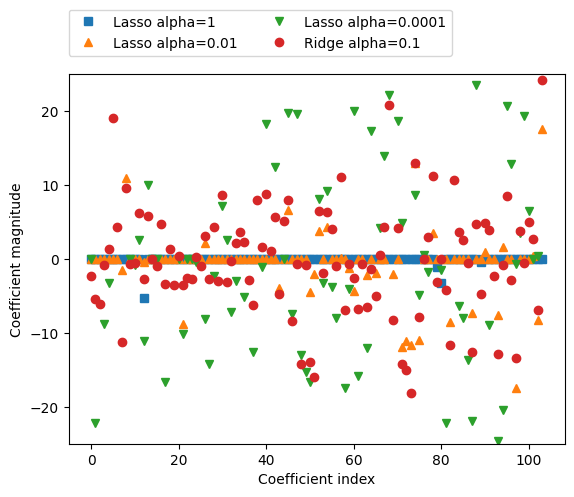

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

**図2-14 Lasso回帰のalphaを変えた場合とリッジ回帰の係数の大きさの比較**

alpha=1の場合には、ほとんどの係数がゼロである（これ這うsでに見た）だけでなく、残りの係数の絶対値もかなり小さいことがわかる。alphaを0.01に減らした場合の結果が上向きの三角である。ここでも、ほとんどの特徴量に対する係数はゼロである。alpha=0.0001にすると、正則化がかなりゆるみ、多くの係数がゼロでなくなり、絶対値も大きくなる。比較のために、最適な場合のRidgeの係数をまるで示す。alpha=0.1のときのRidgeは、alpha=0.01のときのLassoと同じような予測性能を示すが、Ridgeはすべての係数がゼロではない。  
実際に使う場合には、この２つのうちではリッジ回帰をまず試してみるとよいだろう。しかし、特徴量がたくさんあって、そのうち重要なものはわずかしかないことが予測されるのであれば、Lassoのほうが向いているだろう。同様に、解釈しやすいモデルがほしいのなら、重要な特徴量のサブセットを選んでくれるLassoのほうが理解しやすいモデルが得られるだろう。scilit-learnには、LassoとRidfgeのペナルティを組み合わせたElasticNetクラスがある。実用上は、この組み合わせが最良の結果をもたらすが、それにはL1正則化のパラメータとL2正則化のパラメータの２つを調整するというコストがかかる。

#### 2.3.3.5 クラス分類のための線形モデル

|クラス分類のための線形モデル|
|:-|

線形モデルはクラス分類にも多用されている。まず、２クラス分類を見てみよう。この場合は、次の式で予測を行う。$$\hat{y}=w[0] \times x[0] + w[1] \times x[1]+ \cdots + w[p] \times x[p] + b > 0$$

この式は、線形回帰の場合とよく似ているが、特徴量の重み付き和を単に返すのではなく、予測された値が0を請えるかどうかで分割している。この関数の値が0より小さければ、クラスは-1になる。0より大きければ、クラスは+1になる。この予測のルールはすべての線形モデルによるクラス分類に共通している。ここでも、係数（$w$）と切片（$b$）を求めるには様々な方法がある。

線形モデルによるクラス分類では、**決定境界**が入力の線形関数になる。言い換えると線形の２クラス分類器は、２つのクラスを直線や平面や超平面で分割するということだ。本節でこの例を示す。


線形モデルを学習するにはさまざまなアルゴリズムがある。これらのアルゴリズムは以下の２点で区別される。
- 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
- 正規化を行うか。行うならどの方法を使うか。

「訓練データへの適合度」を測る尺度は、アルゴリズムによって異なる。linear_model.LogisticRegressionに実装されている**ロジスティック回帰**はと、svm.LineatSVCに実装されている**線形サポートベクターマシン**は、最も一般的な線形クラス分類アルゴリズムだ。LogisticRegressionモデルとLinearSVCモデルをforgeデータセットに適用して、決定境界を可視化してみよう。（**図2-15**）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.model_selection import train_test_split

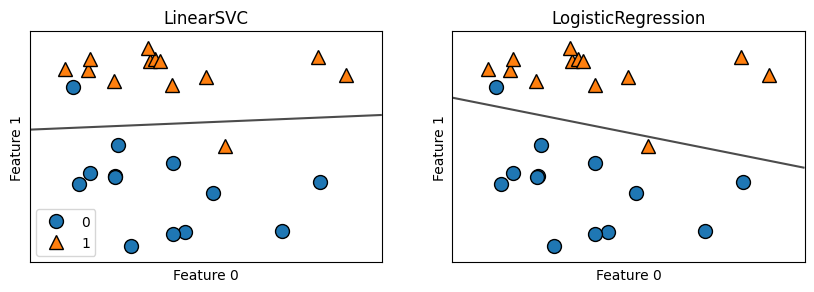

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

この図は、以前と同じようにforgeデータセットの第1特徴量を$x$軸に、第2特徴量をy軸にとり、LinearSVCとLogisticRegressionで見つけた決定境界を直線で表示している。直線の下がクラス0、上がクラス1になる。つまり、黒い線よりも上にあるデータポイントはクラス分類器によってクラス1に分類され、下にあるデータポイントはクラス0に分類される。２つのモデルによる決定境界はよく似ている。両方のモデルはともに、２つのポイントを他方のクラスに分類している。デフォルトではこれらのモデルは、Ridgeが回帰で行ったのと同様に、L2正則化を行う。

LinearSVCとLogisticRegressionにおける正則化の強度を決定するトレードオフパラメータはＣと呼ばれ、Ｃが大きくなると正則化は**弱く**なる。つまり、パラメータＣを大きくすると、LinearSVCとLogisticRegressionは訓練データに対しての適合度を挙げようとするが、パラメータＣを小さくすると係数ベクトル（$w$）を0に近づけることを重視するようになる。

Ｃの影響にはもう一つ面白い側面がある。小さいＣを用いると、データポイントの「大多数」に対して適合しようとするが、大きいＣを用いると、個々のデータポイントを正確にクラス分類することを重視するようになる。LinearSVCの場合の様子を見てみよう。（**図2-16**）

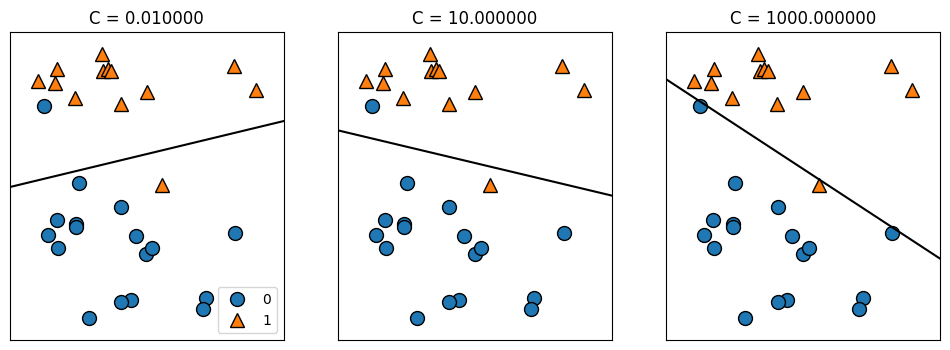

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

**図2-16 forgeデータセットを用いた場合の異なるＣに対する決定境界**

左のプロットは小さいCを用いていて強力な正則化を行う場合に対応する。クラス0のほとんどの点が線の下に、クラス1のほとんどの点が線の上に来ている。この強力に正則化が効いたモデルは水平に近く、２つの点のクラス分類に失敗している。Cが少し大きい場合に対応する真ん中のグラフでは、モデルは２点の分類に失敗したサンプルに着目するので、決定境界が傾いている。最後に、Cがとても大きい場合に対応する右のグラフでは、決定境界の傾きはさらに急になり、クラス0のすべての点を正しくクラス分類するようになる。クラス1の点の１つはまだ失敗しているが、これは、このデータセットを直線で分類する場合には、すべての点を正しく分類することは不可能だからだ。この右側のモデルはすべての点を正しくクラス分類することに注力するあまり、クラス全体としてのレイアウトを捉えきれていない。つまり、このモデルはおそらく過剰適合している。

回帰の場合と同様に、線形モデルによるクラス分類は、低次元空間においては制約が強すぎるように思えるかもしれない。決定平面が直線や平面にしかならないからだ。しかし、高次元の場合には線形モデルによるクラス分類は非常に強力になるので、特徴量の数が多い場合には過剰適合を回避する方法が重要になってくる。

LogisticsRegressionをcancerデータセットを用いてより詳しく解析してみよう。

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


↑このメッセージは、ロジスティック回帰モデルの訓練中に収束しなかったことを示しています。具体的には、lbfgsソルバーが最大反復回数に達したため、最適化が完了しなかったことを意味します。これにより、モデルのパフォーマンスが最適でない可能性があります。

デフォルトのC=1は、訓練セットとテストセットの双方で95%と、とても良い性能を示している。しかし、訓練セットとテストセットの精度がとても近いということは、適合不足の可能性が貴い。Cを増やしてより柔軟なモデルにしよう。

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.965


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=100にすると、訓練セット精度が向上し、テストセット精度もわずかに向上する。複雑なモデルのほうが性能が高いはずだという直感は裏付けられた。

さらに強力に正則化したモデルを試してみよう。デフォルトのC=1をC=0.01にしてみる。

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


予想通り、すでに適合不足だったモデルから図2-1のさらに左側に寄ってしまい、訓練セット精度もテストセット精度もデフォルトパラメータより悪くなっている。

最後に、３つの正則化パラメータＣに対して学習された係数を見てみよう。

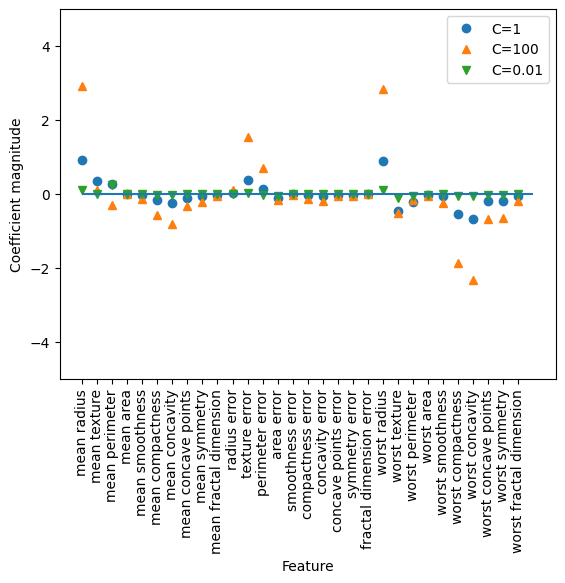

In [ ]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()



**図2-17 cancerデータセットを用いて異なるCの値に対してロジスティック回帰で学習した際の係数**

> LogisticRegressionではデフォルトでL2正則化が行われる。結果は図2-12のRidgeによるものと似ている。正則化を強くすると、係数はより0近くへと押し込まれるが、ぴったり0には決してならない。グラフをより詳細に見てみると、３番目の特徴量「mean perimeter」に対する係数が興味深い挙動を示しているのがわかる。C=100とC=1に対して係数は負だが、C=0.001に対しては正になっている。このようなモデルを解釈する際には、どの係数がクラス分類に影響を与えているのかを考察する。例えば、特徴量「texture error」が大きいことと、「悪性（malignant）」都に関係があるのではないか、などと考える。しかし、「mean perimeter」のように、モデルのによって係数の政府が変わってしまうと、どのモデルを見るかによって、「mean perimeter」が大きいことが「良性」を示唆しているのか「悪性」を示唆しているのかが変わってしまう。このことからも、線形モデルの係数の解釈は常に眉につばを付けて聞かないといけないことがわかる。

より解釈しやすいモデルが欲しいのなら、L1正則化を使うといいかもしれない。この正則化はわずかな特徴量しか使わないように制限するからだ。L1正則化を行った時の分類制度をプロットしたものを**図2-18**に示す。

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


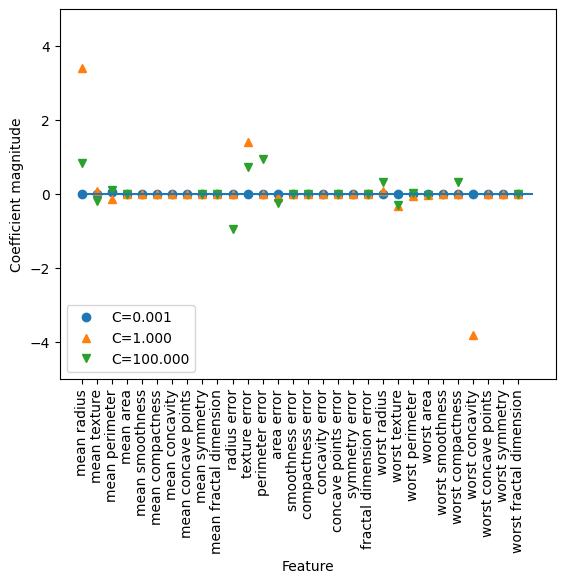

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


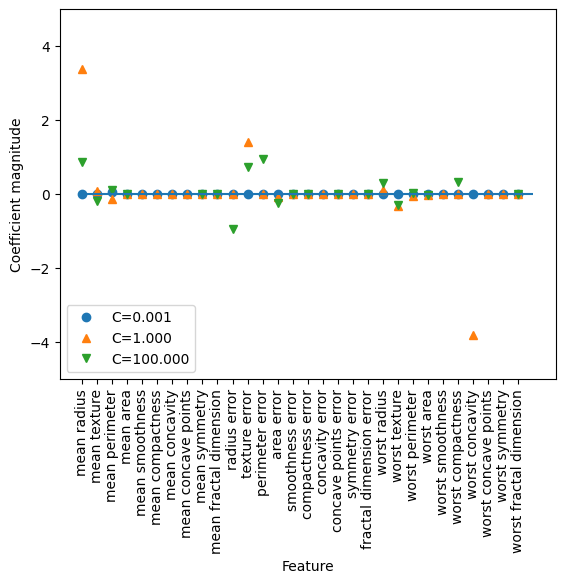

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# データのロードと分割（前提として既に行われていると仮定）
# X_train, X_test, y_train, y_test, cancer

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

**図2-18 cancerデータセットを用いて異なるCの値に対してL1ペナルティでロジスティック回帰で学習した際の係数**

この図からもわかる通り、２クラス分類のための線形モデル軍と回帰のための線形モデル軍の間には対応関係がある。回帰の時と同じように、モデル間の主な違いはpenaltyパラメータにある。このパラメータがモデルの正則化と、特徴量をすべて使うか一部にしか使わないかに影響を与える。

#### 2.3.3.6 線形モデルによる多クラス分類

|線形モデルによる多クラス分類|
|:-|

多くの線形クラスの分類モデルは、２クラス分類にしか適用できず、自然に多クラスの場合に拡張できるものではない（ロジスティクス回帰は例外）。２クラス分類アルゴリズムを多クラス分類アルゴリズムに拡張する一般的な手法として**１対その他**（one-vs.-rest）アプローチがある。１対その他アプローチでは、各クラスに対してそのクラスと他のすべてのクラスを分類する２クラス分類モデルを学習する。クラスがたくさんある場合にはたくさんの２クラス分類モデルを使うことになる。予測の際にはすべての２クラス分類器をテストデータポイントに対して実行する。一番高いスコアのクラス分類器が「勝ち」、その分類器対応するクラスが予測結果となる。

１クラスにつき１つの２クラス分類器があるということは、クラスごとに係数ベクトル（$w$）を切片（$b$）があるということになる。下に示す各進度を表す式の値が最も大きいクラスが、クラスベクトルとして割り当てられる。$$w[0] \times x[0] + w[1] \times x[1]+ \cdots + w[p] \times x[p] + b$$

多クラスロジスティック回帰の背後にある数字は、１対その他アプローチとは少し異なるが、結局１クラスあたり係数ベクトルと切片ができるのは同じで、同じ方法で予測を行うことができる。

単純な３クラス分類データセットに対して、１対その他手法を適用してみよう。ここでは各クラスをガウス分布でサンプリングした２次元データセットを用いる。（**図2-19**）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

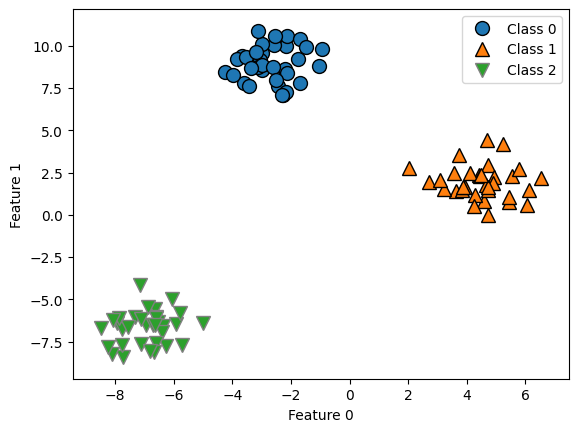

In [ ]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

**図2-19 ３クラスからなる２次元のトイデータセット**

さて、LinearSVCクラスからなる分類器をこのデータセットで学習させてみよう。

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)
print("Coefficient shape（係数配列の形状）: ", linear_svm.coef_.shape)
print("Intercept shape（切片配列の形状）: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [ ]:
print("Coefficient（係数）:\n", linear_svm.coef_)
print("Intercept（切片）:\n", linear_svm.intercept_)

Coefficient（係数）:
 [[-0.17492412  0.23140766]
 [ 0.47622012 -0.06936786]
 [-0.18914207 -0.20400079]]
Intercept（切片）:
 [-1.07745775  0.13139239 -0.08604962]


coef_配列の形は(3, 2)になっている。つまりcoef_の各行には各クラスに対応する係数ベクトルが入っており、各列には個々の特徴量（このデータセットの場合は２つ）に対する係数が格納されている。intercept_はこの場合は１次元配列になっていて、各クラスに対する切片が格納されている。

３つのクラス分類器による直線を可視化してみよう。

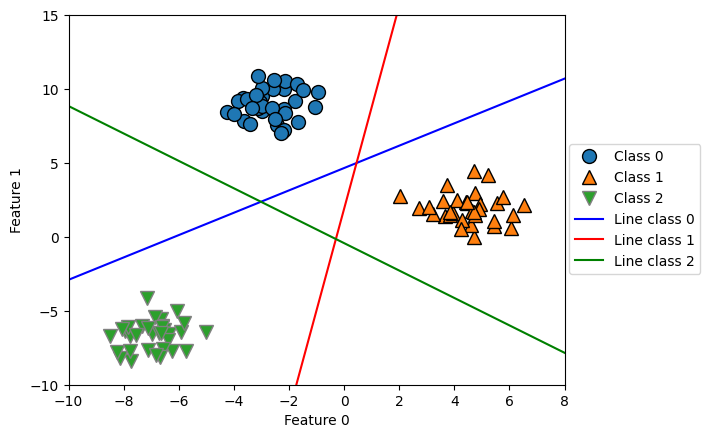

In [ ]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

**図2-20 ３つの１対その他クラス分類器で学習させた決定境界**

訓練データ中のクラス0に属するすべての点がクラス0に対応する直線よりも上にある。これはこのクラス分類器で「クラス０」に分類されたことを意味する。クラス０に属する点群は、クラス２に対応するクラス分類器で「その他」のほうに分類されたことを意味する。クラス０に属する点群は、クラス１人対応する線よりも左にある。これは、クラス１に対応するクラス分類器で「その他」の方に分類されたことを意味する。したがって、この領域にあるすべての点は、最終的な分類器によってクラス０に分類される（クラス分類確信度の式がクラス０の分類器では０より大きくなり、他の分類器では０より小さくなる）。

しかし、kのグラフの中央の三角形の部分はどうなるのだろうか？３つのクラス分類器はすべて、この領域の点を「その他」と分類する。この領域の点をどこに分類すればよいのだろうか？その答えは、「クラス分類式の値が一番大きいクラス」、つまりその点に最も近い線を持つクラスである。

下に示す例は、２次元空間すべての点に対する予測を描画したものだ（**図2-21**）。

Text(0, 0.5, 'Feature 1')

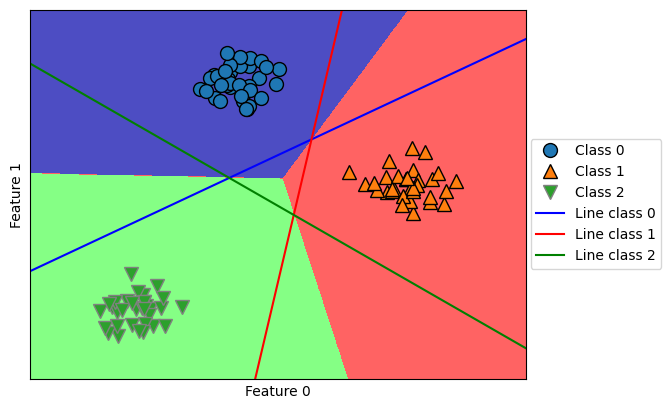

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-21 ３つの一対その他クラス分類器による多クラス分類の決定境界**

#### 2.3.3.7 利点、欠点、パラメータ

線形モデルの主要なパラメータは、回帰モデルではalpha、LinearSVCとLogisticRegressionではCと呼ばれる正則化パラメータである。alphaが大きい場合、Cが小さい場合は単純なモデルに対応する。特に回帰モデルの場合、このパラメータの調整は非常に重要になる。通常、Cやalphaを調整する際には、対数スケールで値を変更する。もう一つ決めなければならないことはL1正則化を使うかL2正則化を使うかである。一部の特徴量だけが重要だと思うならば、L1を使うべきだ。そうでなければ、デフォルトとしてはL2をつかったほうがよいだろう。L1はモデルの解釈のしやすさが重要な場合にも有用である。L1を使うと小数の特徴量子化使わなくなるので、どの特徴量がそのモデルにとって重要なのか、その特徴量がどのような効果を持つのかを説明しやすい。

線形モデルの訓練は非常に高速で、さらに予測も高速である。非常に大きいデータセットにも適用できるし、疎なデータに対してもうまく機能する、サンプル数が10万点、100万点もあるようなデータに対しては、LogisticRegressionのとRidgeにsolver='sag'オプションをく買うことを県そうした方が良いだろう。このぷしょんを使うと、大きなデータセットに対して、デフォルトの場合よりも高速な場合がある。これらのクラスは、ここで述べたよりもさらに大規模なデータに適した線形モデルを実装している。

線形モデルのもう一つの利点は、予測手法が比較的理解しやすいということである。回帰予測や分類予測は先に示したような方法によって行われる。しかし、残念なことに、係数がどうしてその値になっているのかは、それほど明らかではない。特にデータセットの中に、強く相関した特徴量がある場合はわかりにくい。このような場合には係数の意味を理解するのは難しい。

線形モデルは、特徴量の数がサンプルの数よりも大きいときに性能を発揮する。大きなデータセットに対して適用されることも多いが、これは単に他のモデルでは学習できないからである。しかし、低次元空間では、他のモデルのほうが良い汎化性能を示すこともある。「2.3.7 カーネル法を用いたサポートベクタマシン」で、線形モデルではうまくいかない例を示す。